<a href="https://colab.research.google.com/github/bala-codes/FAKE-VS-REAL-NEWS-CLASSIFIER-USING-ML-AND-DL-MODELS/blob/master/codes%20(FASTAI)/Part%201%20FAKE%20NEWS%20CLASSIFIER%20TRAINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# https://medium.com/technonerds/using-fastais-ulmfit-to-make-a-state-of-the-art-multi-label-text-classifier-bf54e2943e83

# https://docs.fast.ai/text.html

In [ ]:
import fastai
from fastai import *
from fastai.text import *
import pandas as pd
import numpy as np
from functools import partial
import io
import os

In [ ]:
header = ['SECTION_CLEANED','label']
final_df = pd.read_csv('/content/drive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/FAKE VS REAL NEWS - FINAL DATASETS/dfcleanedascsv.csv',usecols = header) 
final_df = pd.DataFrame(final_df)

final_df.dropna(inplace=True)
final_df = final_df.rename(columns = {"SECTION_CLEANED": "content"}) 

In [ ]:
final_df.tail()

,label,content
6946,REAL,hbos real time host bill maher – someone often...
6947,REAL,new york cnn hillary clinton visit two battleg...
6948,REAL,hollywood lose yet another one dearest actress...
6949,REAL,story highlight trump sit chair onstage feet a...
6950,REAL,donald trump jr son republican presidential no...


In [ ]:
from sklearn.model_selection import train_test_split

df_trn, df_val = train_test_split(final_df, stratify = final_df['label'], test_size=0.20)

In [ ]:
print(df_trn.shape, df_val.shape)

(5559, 2) (1390, 2)


In [ ]:
data_lm = TextLMDataBunch.from_df(train_df = df_trn , valid_df = df_val, path = "")

data_clas = TextClasDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "", vocab = data_lm.train_ds.vocab, bs=32 )

In [ ]:
data_lm.save('/content/drive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/PACKAGE 3 - SOURCE CODES AND FILES/SOTA MODELS/data_lm_export.pkl')
data_clas.save('/content/drive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/PACKAGE 3 - SOURCE CODES AND FILES/SOTA MODELS/data_clas_export.pkl')

In [ ]:
data_clas.show_batch()

text,target
xxbos moment every donald trump rally donald trump marvel crazy spectacle he s create “ is place america fun donald trump rally ask mischievous pursedlip grin moment always come protester try interrupt drown arena full rowdy white people scream “ trump trump trump that s fun part joint release pentup fury thousands proudly politically incorrect americans experience person feel catharsis vent whiners moochers mexicans muslims take country gleefully defy scold,REAL
xxbos afraid dangerous trump presidency protesters preemptively burn america grind clinton foundation foreclosure foreign donors demand refund hillary clinton blame youtube video unexpected spontaneous voter uprise prevent inevitable move white house sudden rise sea level explain disproportionately large tear shed climate scientists aftermath trump electoral victory fbi director comey delight receive nobel prize speed read 65 xxrep 4 0 email one week un deploy troop american college campuses order combat,FAKE
xxbos trump rally hollywood boulevard 102916 users browse forum google bot xxunk media yahoo bot 68 guests display post previous power phpbb © 2000 2002 2005 2007 phpbb group uncontested absurdities today accept slogans tomorrow come accept degrees precedent implication erosion default dint constant pressure one side constant retreat day suddenly declare countrys official ideology ayn rand rubiks rubiks cube ® use special individual permission seven town ltd write number,FAKE
xxbos unite state marine field mcconnell plum city online xxunk october 26 2016 1 abel danger ad claim hillary clinton use doj pride 8a actors blackmail mentor federal bridge certification authority – include erstwhile directors boeing lockheed martin raytheon northrop grumman – child pornography originate bc pig farm 2 ad claim early 2001 clintons 8a company use xxunk network xxunk starnet set server federal bridge basement chappaqua home allegedly use,FAKE
xxbos editors note update 125 pm et friday additional factchecking information hillary clinton accept democratic nomination president thursday night deliver speech lay plan address terrorist threats create job nprs politics team annotate clintons speech portion comment highlight follow analysis context fact check italics thank thank much thank thank much thank thank thank much thank amaze welcome thank great convention we ve chelsea thank i m proud mother proud woman you,REAL


In [ ]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.10E-02
Min loss divided by 10: 2.51E-02


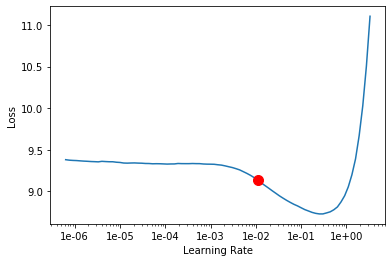

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [ ]:
learn.fit_one_cycle(2, min_grad_lr)
print(min_grad_lr)

epoch,train_loss,valid_loss,accuracy,time
0,7.003057,6.708082,0.099150,05:38
1,6.431359,6.508562,0.112013,05:39


In [ ]:
# unfreezing weights and training the rest of the NN
learn.unfreeze()
learn.fit_one_cycle(2, min_grad_lr)

epoch,train_loss,valid_loss,accuracy,time
0,6.102898,6.369772,0.122942,06:30
1,5.801328,6.302051,0.130231,06:30


In [ ]:
learn.predict("United States of America", n_words=10)

'United States of America mix giustra interest foundation behind game one owners not recognise'

In [ ]:
learn.save_encoder('/content/drive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/PACKAGE 3 - SOURCE CODES AND FILES/SOTA MODELS/ft_enc')

# TEXT CLASSIFIER

In [ ]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (5559 items)
x: TextList
xxbos change many americans head poll vote 2016 election tuesday secretary state john kerry travel to … antarctica kerrys trip include visit xxunk xxunk south pole station make first secretary state visit antarctica accord press release national science foundation come curious time give ongoing election ask time state department spokesman john kirby insist purpose “ to talk researchers scientists largely climate change research reporter respond question legitimacy trip note “ there s criticism trip basically know secretary want knock antarctica bucket list he s taxpayer expense kirby insist important kerry “ to see firsthand learn environment south pole “ as individual literally champion climate change research awareness decades secretary remain commit increase awareness education public kirby say location kerrys trip also interest russian scientists draw criticism 2012 drill xxunk “ alien lake vostok scienti

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.74E-03
Min loss divided by 10: 5.25E-02


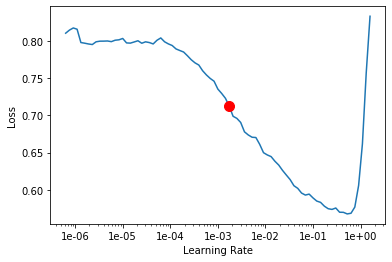

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [ ]:
print(min_grad_lr)
learn.fit_one_cycle(10, min_grad_lr)

0.001737800828749376


epoch,train_loss,valid_loss,accuracy,time
0,0.410680,0.328541,0.873381,02:38
1,0.338782,0.307484,0.881295,02:49


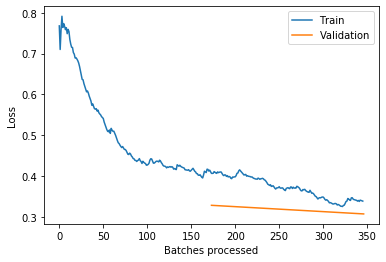

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(4, slice(5e-3, 2e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.357944,0.309379,0.880576,03:39
1,0.315535,0.258528,0.905036,03:04
2,0.246118,0.234454,0.913669,03:35
3,0.199054,0.226157,0.915108,03:49


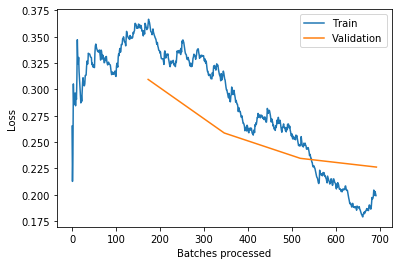

In [ ]:
learn.recorder.plot_losses()


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(5, slice(2e-3/100, 2e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.188117,0.236767,0.911511,06:49
1,0.199807,0.234869,0.911511,06:17
2,0.169954,0.247142,0.921583,07:07
3,0.136344,0.239664,0.917986,07:07


In [ ]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_confusion_matrix()

In [ ]:
learn.predict("homebrew not working")


In [ ]:
output = learn.predict(input())
print(output)

With both BJP and Shiv Sena locking horns over who will be the CM of Maharashtra, there seems to be no end to the bickering between the two parties. And adding fuel to the fire are daily statements from Saamna Editor Sanjay Raut.  Sanjay-Raut  All that is now set to change after Supreme Court has asked Mr. Raut to give his vocal chords some much deserved rest and let leaders of both parties find a solution through discussions.  The Saamna Editor has been relentless with his daily comments, on behalf of his party, to have a Shiv Sainik as the CM of Maharashtra. SC termed it as noise pollution and pointed that it was unwanted at a time when a major portion of the country was grappling with air pollution.  “Mr. Raut has made his point of view pretty clear and now he should just keep quiet. It is understood that both parties want their CM in Maharashtra. But his rants are unwanted and unnecessary,” the Judge pointed out.  Home Minister Amit Shah welcomed the Court’s decision and said, “Mat

In [ ]:
learn.export()
